In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

1. Data Preparation

In [2]:
df = pd.read_csv(r"/Users/vinayak.hariharan/Personal Projects/Air-Compressor-Analysis/air_compressor_sales_data.csv")
df.head()

,Product_ID,Compressor_Type,Product_Name,Power_Rating(HP),Capacity(CFM),Pressure_Rating(PSI),Date_of_Sale,Sales_Channel,Sales_Region,Unit_Price,...,Energy_Consumption(kWh),Energy_Efficiency,Operating_Cost,Environmental_Impact,Market_Trends,Customer_Satisfaction_Ratings,Marketing_Campaigns,Promotional_Discounts,Industry_Regulations,industries
0,1000,OIL LUBRICATED PISTON AIR COMPRESSORS,ALUMINIUM COAXIAL PISTON COMPRESSORS,1,463,541,2023-03-20,Online Platform,South Region,8300,...,9.6,0.49,7061.20,Low emissions,Stable,4.8,Email Campaign,10% off for bulk orders,Compliance with industry standards,Food & Beverages
1,1001,OIL LUBRICATED PISTON AIR COMPRESSORS,HIGH PRESSURE PISTON COMPRESSORS,10,451,548,2023-04-05,Distributor,West Region,11000,...,15.7,0.24,7267.06,Minimal environmental impact,Growing,4.3,Trade Shows,15% off for first-time buyers,No specific regulations,Hydel
2,1002,OIL LUBRICATED PISTON AIR COMPRESSORS,LD SERIES PISTON COMPRESSOR,7,516,548,2023-05-17,Distributor,North Region,10100,...,23.2,0.26,7708.52,Minimal environmental impact,Growing,3.8,Trade Shows,15% off for first-time buyers,No specific regulations,Textile
3,1003,OIL LUBRICATED PISTON AIR COMPRESSORS,LD SERIES PISTON COMPRESSOR,5,541,553,2023-12-02,Direct Sales,South Region,9500,...,4.2,0.72,8008.18,Environmentally friendly design,Stable,3.5,Trade Shows,"Free shipping for orders above rs.10,000",No specific regulations,Hydel
4,1004,OIL LUBRICATED SCREW AIR COMPRESSORS,ELECTRIC LUBRICATED EG SERIES SCREW AIR COMPRE...,30,472,549,2023-10-27,Distributor,North Region,17000,...,24.1,0.17,12887.99,Minimal environmental impact,Growing,4.4,Social Media Ads,"Free shipping for orders above rs.10,000",No specific regulations,Textile


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Product_ID                     15000 non-null  int64  
 1   Compressor_Type                15000 non-null  object 
 2   Product_Name                   15000 non-null  object 
 3   Power_Rating(HP)               15000 non-null  int64  
 4   Capacity(CFM)                  15000 non-null  int64  
 5   Pressure_Rating(PSI)           15000 non-null  int64  
 6   Date_of_Sale                   15000 non-null  object 
 7   Sales_Channel                  15000 non-null  object 
 8   Sales_Region                   15000 non-null  object 
 9   Unit_Price                     15000 non-null  int64  
 10  Quantity_Sold                  15000 non-null  int64  
 11  Total_Sales_Revenue            15000 non-null  int64  
 12  Customer_ID                    15000 non-null 

In [4]:
df.describe()

,Product_ID,Power_Rating(HP),Capacity(CFM),Pressure_Rating(PSI),Unit_Price,Quantity_Sold,Total_Sales_Revenue,Customer_ID,Energy_Consumption(kWh),Energy_Efficiency,Operating_Cost,Customer_Satisfaction_Ratings
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,8499.500000,69.653867,639.529667,560.766533,28896.160000,5.479267,1.588896e+05,7600.500000,22.241973,0.363893,23825.385515,4.253520
std,4330.271354,90.339545,311.432897,39.332554,27101.863417,2.889151,1.892158e+05,4330.271354,16.068674,0.189996,22735.071444,0.433582
min,1000.000000,1.000000,450.000000,540.000000,8300.000000,1.000000,8.300000e+03,101.000000,1.700000,0.120000,4968.350000,3.500000
25%,4749.750000,7.000000,484.000000,546.000000,10100.000000,3.000000,4.600000e+04,3850.750000,11.600000,0.230000,8532.957500,3.900000
50%,8499.500000,20.000000,517.000000,551.000000,14000.000000,5.000000,8.550000e+04,7600.500000,18.200000,0.290000,12729.750000,4.300000
75%,12249.250000,100.000000,548.000000,557.000000,38000.000000,8.000000,1.840000e+05,11350.250000,25.300000,0.430000,31066.455000,4.600000
max,15999.000000,335.000000,1755.000000,760.000000,108500.000000,10.000000,1.085000e+06,15100.000000,80.800000,0.960000,116504.160000,5.000000


2. Dala Cleaning 

In [5]:
#Remove less important Columns for Analysis
df = df.drop(columns = ['Product_ID', 'Customer_ID', 'Company_Name', 'Contact_Person', 'Contact_Email', 'Contact_Phone', 'Promotional_Discounts'])

In [6]:
import datetime as dt

df['Date_of_Sale'] = pd.to_datetime(df['Date_of_Sale'])
df['Installation_Date'] = pd.to_datetime(df['Installation_Date'])


In [7]:
df['Sale_Month'] = df['Date_of_Sale'].dt.month
df['Sale_Year'] = df['Date_of_Sale'].dt.year

df['Installation_Month'] = df['Installation_Date'].dt.month
df['Installation_Year'] = df['Installation_Date'].dt.year

# Calculate Age of Air Compressor Installed at Client site

df['Age'] = (pd.to_datetime('today')- df['Installation_Date']).dt.days


In [8]:
# Calculate Profit earned

df['Total_Operating_Cost'] = df['Operating_Cost']*df['Quantity_Sold']
df['Profit'] = df['Total_Sales_Revenue'] - df['Total_Operating_Cost']

3. Data Exploration 

In [9]:
numerical_features = ['Power_Rating(HP)', 'Capacity(CFM)', 'Pressure_Rating(PSI)', 'Unit_Price', 'Quantity_Sold', 'Total_Sales_Revenue', 'Energy_Consumption(kWh)', 'Energy_Efficiency', 'Total_Operating_Cost', 'Customer_Satisfaction_Ratings', 'Age']
categorical_features = ['Compressor_Type', 'Product_Name', 'Sales_Channel', 'Sales_Region', 'industries', 'Environmental_Impact',  'Marketing_Campaigns', 'Industry_Regulations']

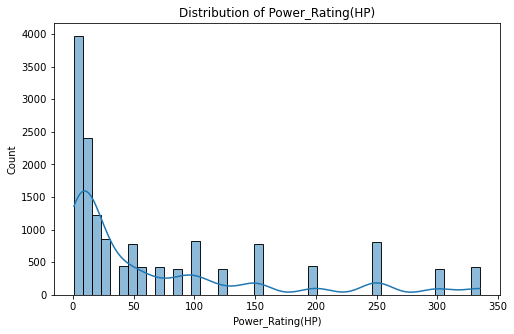

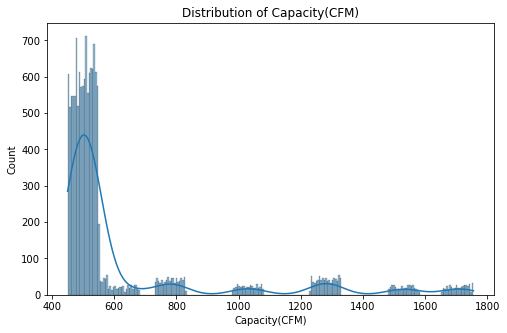

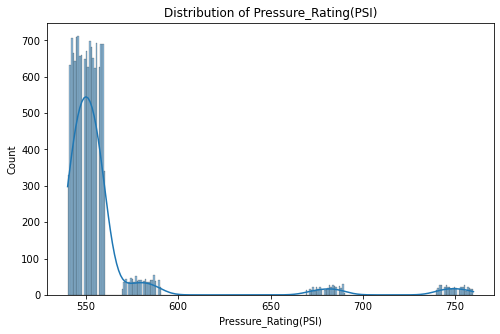

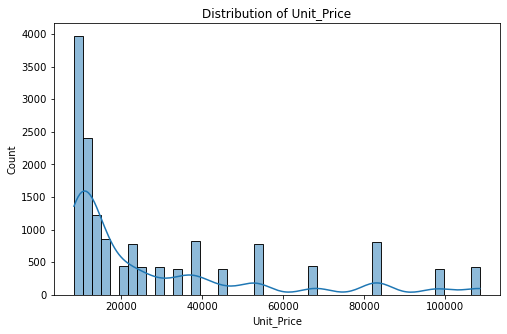

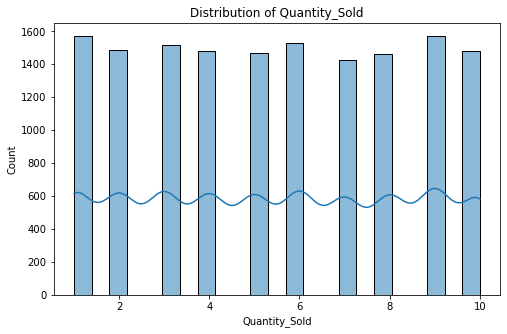

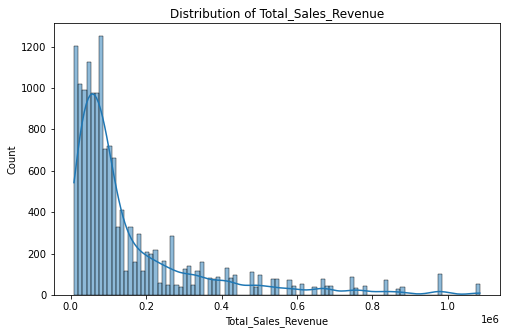

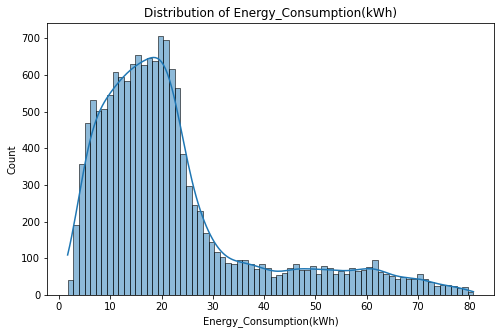

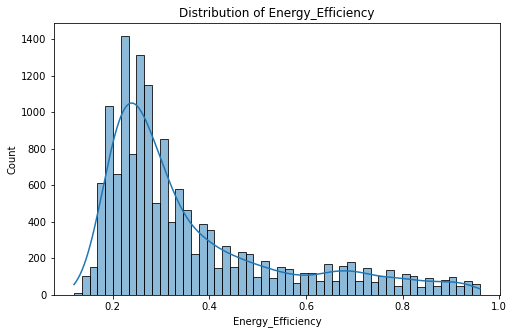

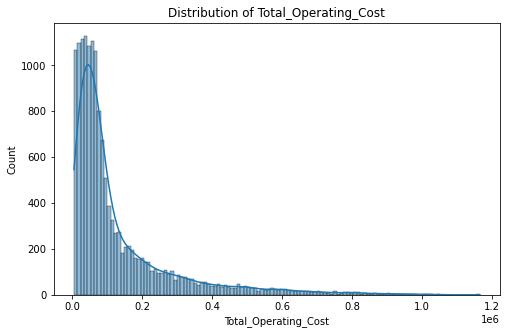

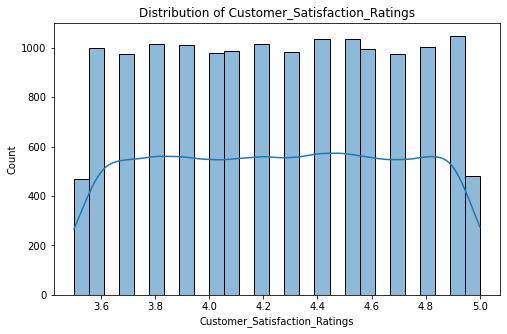

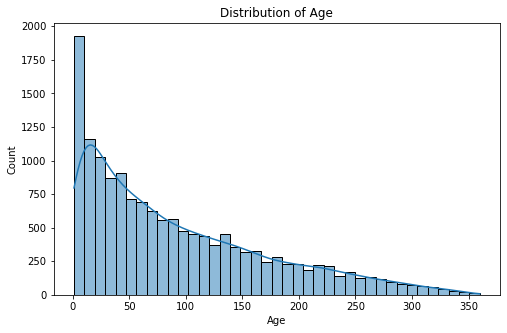

In [10]:
for feature in numerical_features:
    plt.figure(figsize=(8, 5))
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()

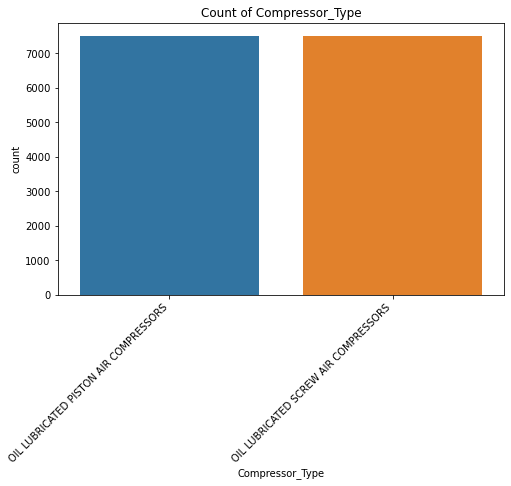

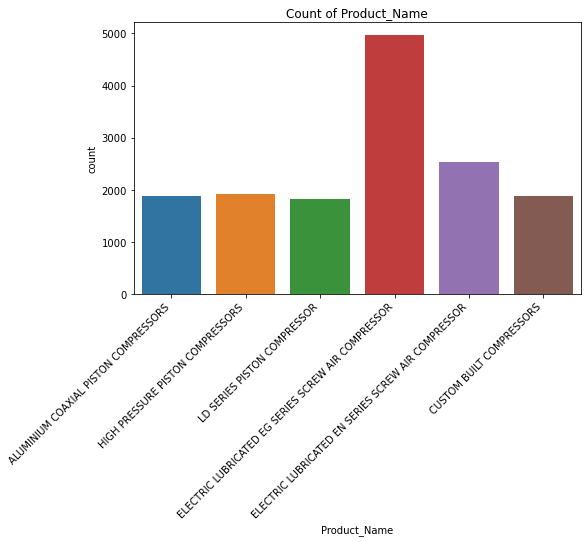

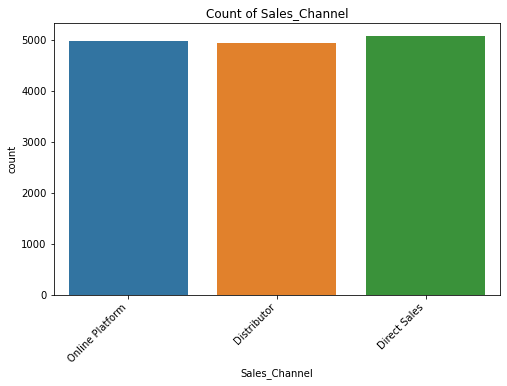

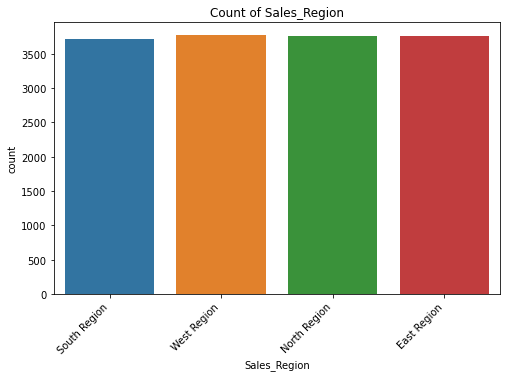

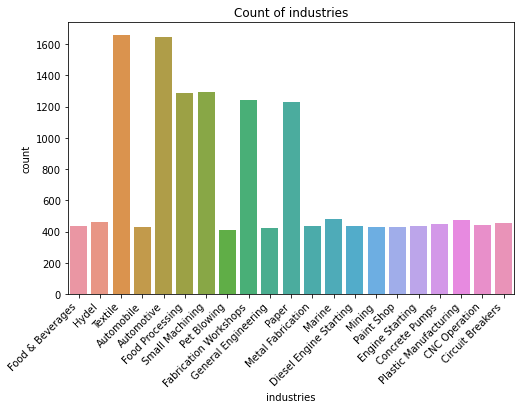

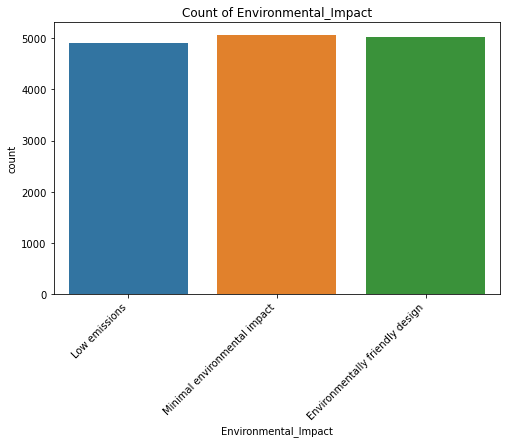

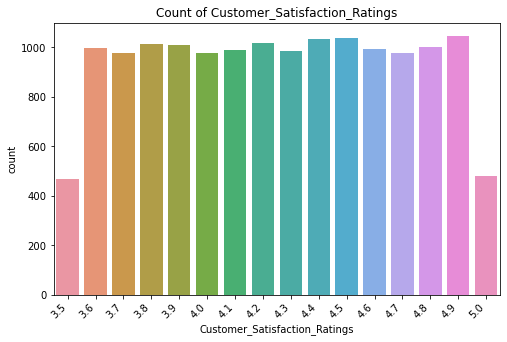

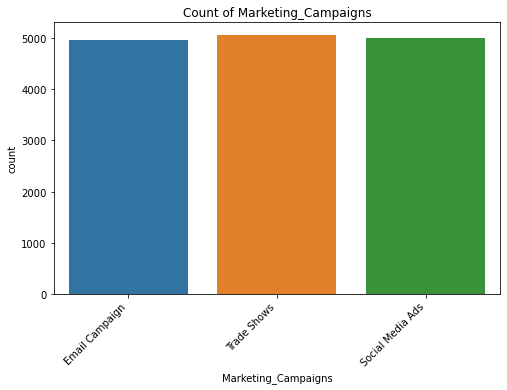

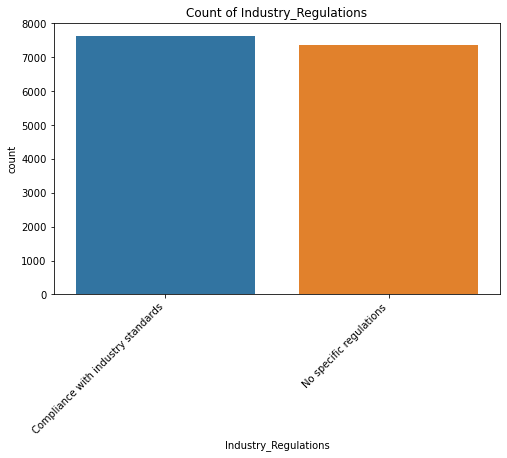

In [14]:
import warnings
warnings.filterwarnings('ignore')

for feature in categorical_features:
    plt.figure(figsize=(8, 5))
    sns.countplot(df[feature])
    plt.title(f'Count of {feature}')
    plt.xticks(rotation=45, ha='right')

Text(0.5, 1.0, 'Count of Products')

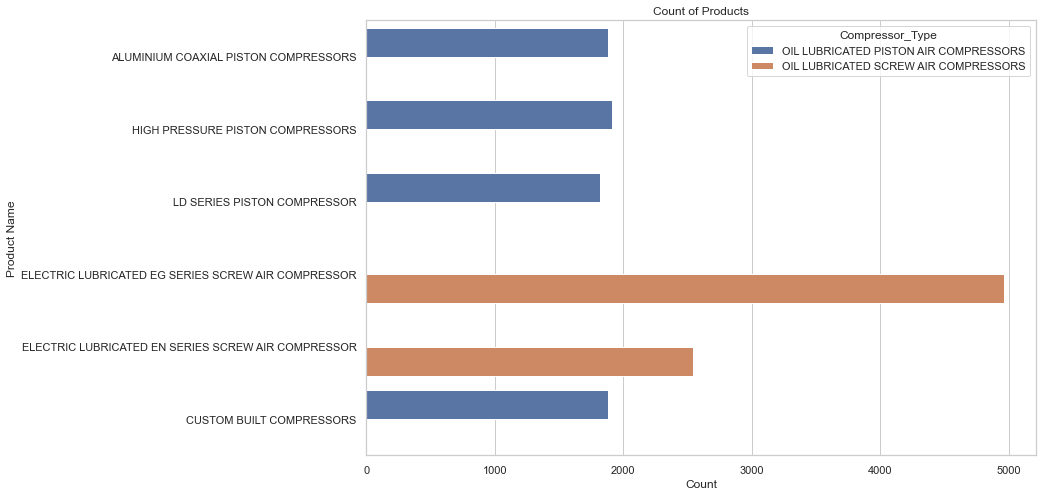

In [59]:
plt.figure(figsize=(12, 8))
sns.countplot(y='Product_Name', hue='Compressor_Type', data=df)

plt.xlabel('Count')
plt.ylabel('Product Name')
plt.title('Count of Products')

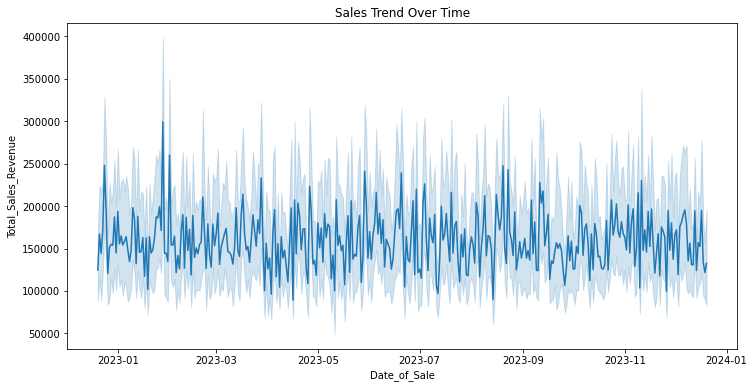

In [20]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date_of_Sale', y='Total_Sales_Revenue', data=df)
plt.title('Sales Trend Over Time')
plt.show()

Text(0.5, 1.0, 'Average Sales Revenue across Sales Channels')

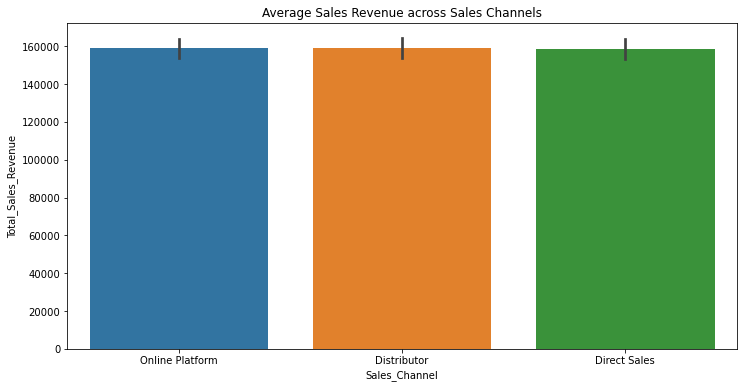

In [16]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Sales_Channel', y='Total_Sales_Revenue', data=df)
plt.title('Average Sales Revenue across Sales Channels')

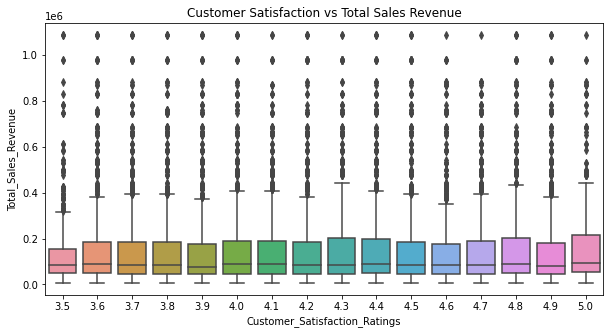

In [17]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='Customer_Satisfaction_Ratings', y='Total_Sales_Revenue', data=df)
plt.title('Customer Satisfaction vs Total Sales Revenue')
plt.show()

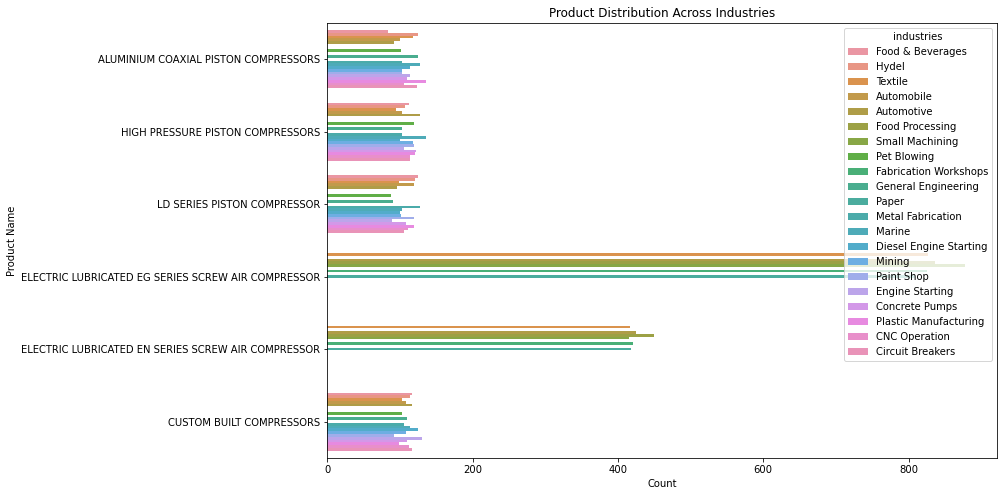

In [19]:
plt.figure(figsize=(12, 8))
sns.countplot(y='Product_Name', hue='industries', data=df)

plt.xlabel('Count')
plt.ylabel('Product Name')
plt.title('Product Distribution Across Industries')
plt.show()

In [49]:
total_revenue_per_product = df.groupby('Product_Name')['Total_Sales_Revenue'].mean().reset_index()
total_revenue_per_product


,Product_Name,Total_Sales_Revenue
0,ALUMINIUM COAXIAL PISTON COMPRESSORS,45828.746667
1,CUSTOM BUILT COMPRESSORS,232261.048304
2,ELECTRIC LUBRICATED EG SERIES SCREW AIR COMPRE...,283237.308622
3,ELECTRIC LUBRICATED EN SERIES SCREW AIR COMPRE...,90236.585366
4,HIGH PRESSURE PISTON COMPRESSORS,63852.519894
5,LD SERIES PISTON COMPRESSOR,56906.310160


Text(0.5, 1.0, 'Average Revenue Across Sale Dates')

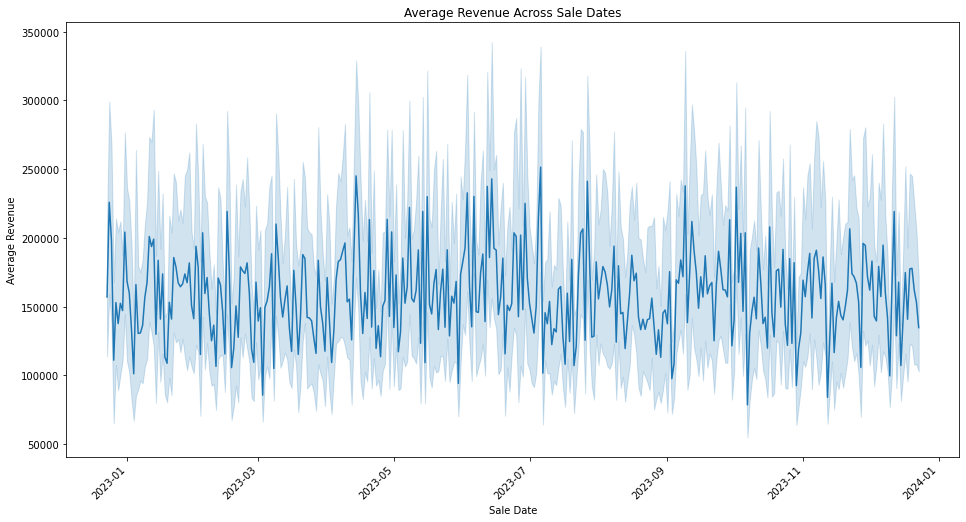

In [21]:
plt.figure(figsize=(16, 8))
sns.lineplot(x='Date_of_Sale', y='Total_Sales_Revenue', data=df)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Sale Date')
plt.ylabel('Average Revenue')
plt.title('Average Revenue Across Sale Dates')

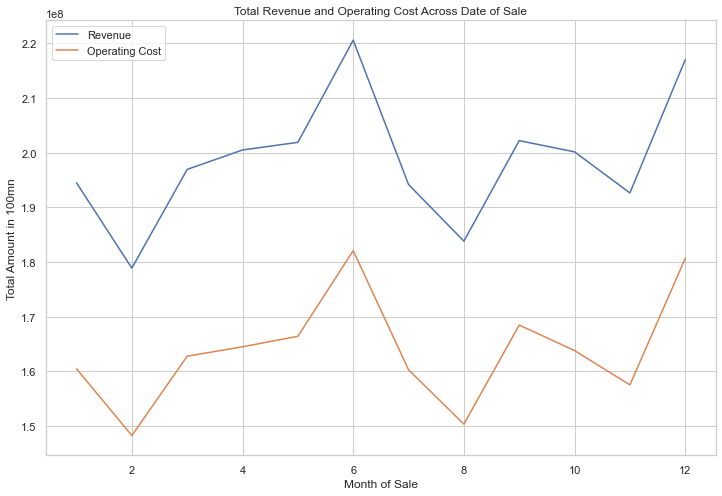

In [28]:
sales_data = df.groupby('Sale_Month').agg({
    'Total_Sales_Revenue': 'sum',
    'Total_Operating_Cost': 'sum',
}).reset_index()

plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")

sns.lineplot(x='Sale_Month', y='Total_Sales_Revenue', data=sales_data, label='Revenue')

sns.lineplot(x='Sale_Month', y='Total_Operating_Cost', data=sales_data, label='Operating Cost')

plt.xlabel('Month of Sale')
plt.ylabel('Total Amount in 100mn')
plt.title('Total Revenue and Operating Cost Across Date of Sale')

plt.legend()


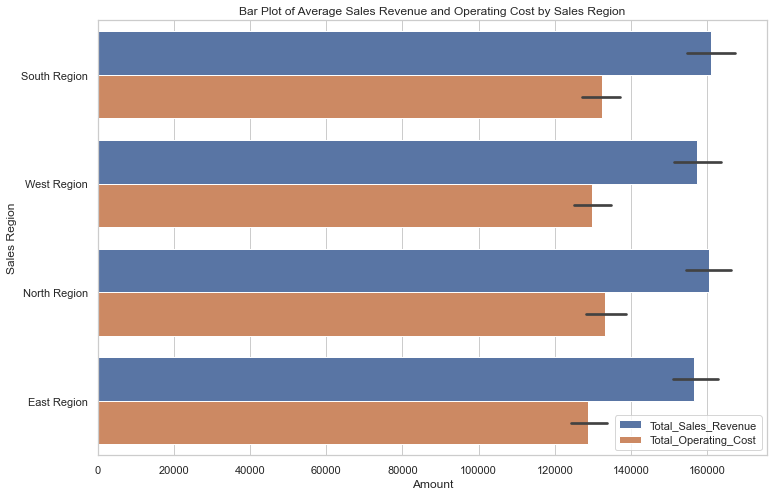

In [27]:
melted_df = pd.melt(df, id_vars=['Sales_Region'], value_vars=['Total_Sales_Revenue', 'Total_Operating_Cost'])
sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))
sns.barplot(x='value', y='Sales_Region', hue='variable', data=melted_df)
plt.xlabel('Amount')
plt.ylabel('Sales Region')
plt.title('Bar Plot of Average Sales Revenue and Operating Cost by Sales Region')
plt.legend()


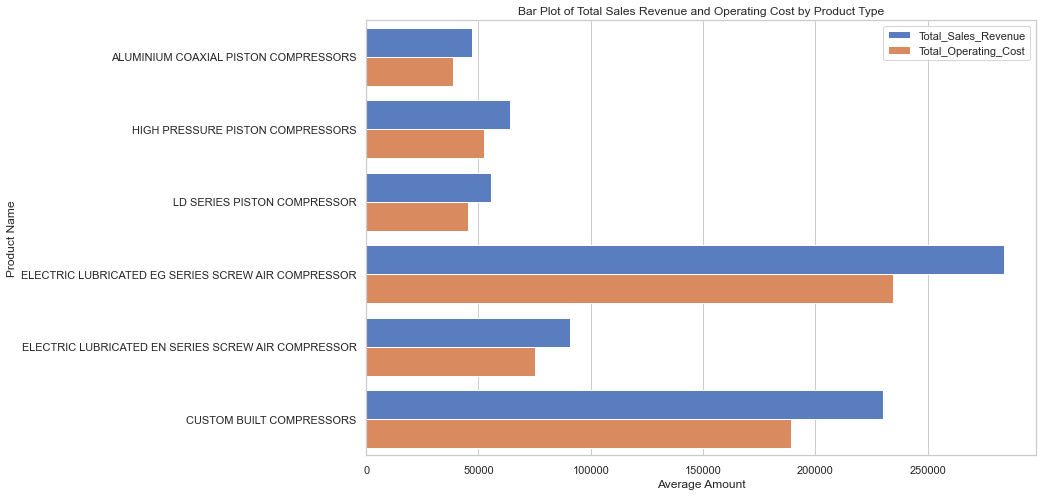

In [29]:
melted_df_product = pd.melt(df, id_vars=['Product_Name'], value_vars=['Total_Sales_Revenue', 'Total_Operating_Cost'])
plt.figure(figsize=(12, 8))
sns.barplot(x='value', y='Product_Name', hue='variable', data=melted_df_product, ci=None, palette='muted', dodge=True)
plt.xlabel('Average Amount')
plt.ylabel('Product Name')
plt.title('Bar Plot of Total Sales Revenue and Operating Cost by Product Type')

plt.legend()

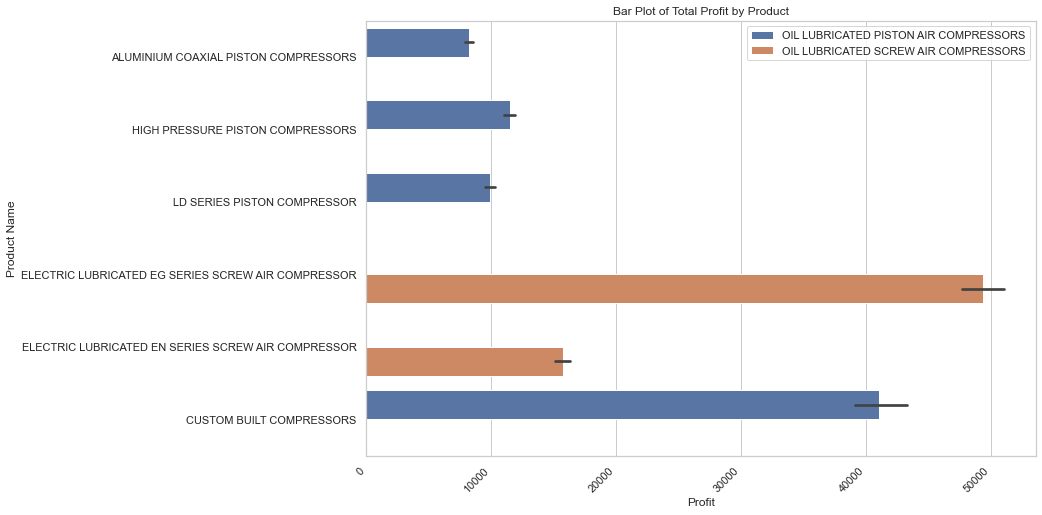

In [30]:

plt.figure(figsize=(12, 8))
sns.barplot(x='Profit', y='Product_Name', hue='Compressor_Type', data=df)
plt.xlabel('Profit')
plt.ylabel('Product Name')
plt.title('Bar Plot of Total Profit by Product')
plt.xticks(rotation=45, ha='right')
plt.legend()


(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'ALUMINIUM COAXIAL PISTON COMPRESSORS'),
  Text(1, 0, 'HIGH PRESSURE PISTON COMPRESSORS'),
  Text(2, 0, 'LD SERIES PISTON COMPRESSOR'),
  Text(3, 0, 'ELECTRIC LUBRICATED EG SERIES SCREW AIR COMPRESSOR'),
  Text(4, 0, 'ELECTRIC LUBRICATED EN SERIES SCREW AIR COMPRESSOR'),
  Text(5, 0, 'CUSTOM BUILT COMPRESSORS')])

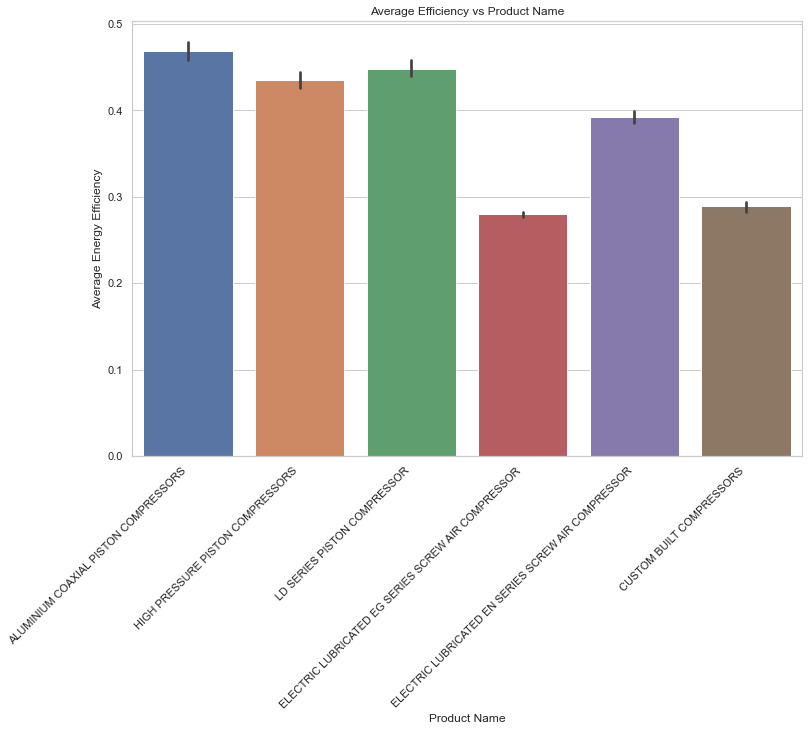

In [63]:
# Individual Product Efficiency

plt.figure(figsize=(12, 8))
sns.barplot(x='Product_Name', y='Energy_Efficiency', data=df)
plt.title('Average Efficiency vs Product Name')
plt.xlabel('Product Name')
plt.ylabel('Average Energy Efficiency')
plt.xticks(rotation=45, ha='right')

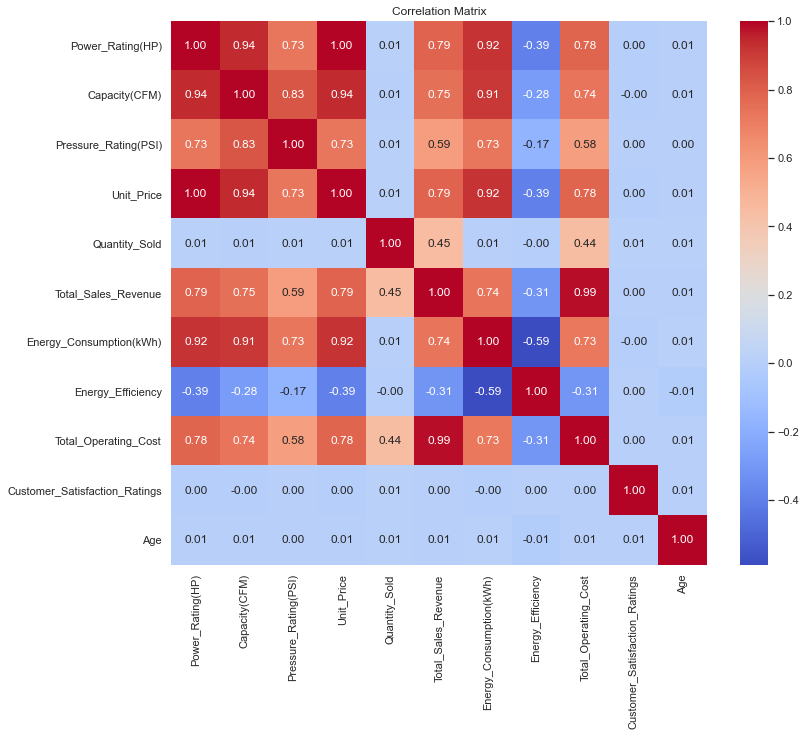

In [31]:
# Check the Correlation of Numerical Data

correlation_matrix = df[numerical_features].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

Text(0.5, 1.0, 'Correlation Matrix')

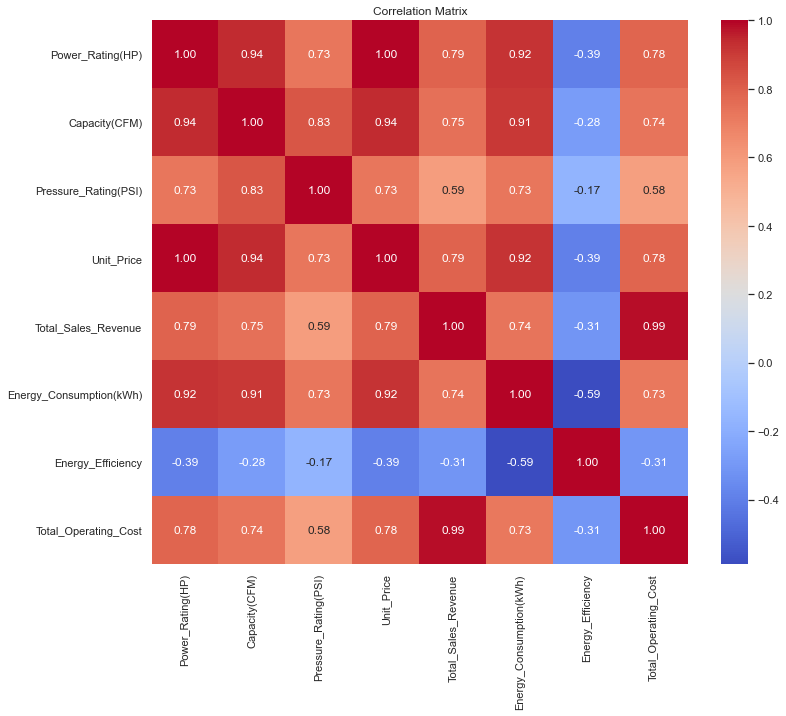

In [40]:
# Correlation Matrix After Dropping a few Cols

new_numerical_features = ['Power_Rating(HP)', 'Capacity(CFM)', 'Pressure_Rating(PSI)', 'Unit_Price', 'Total_Sales_Revenue', 'Energy_Consumption(kWh)', 'Energy_Efficiency', 'Total_Operating_Cost']
new_correlation_matrix = df[new_numerical_features].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(new_correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')


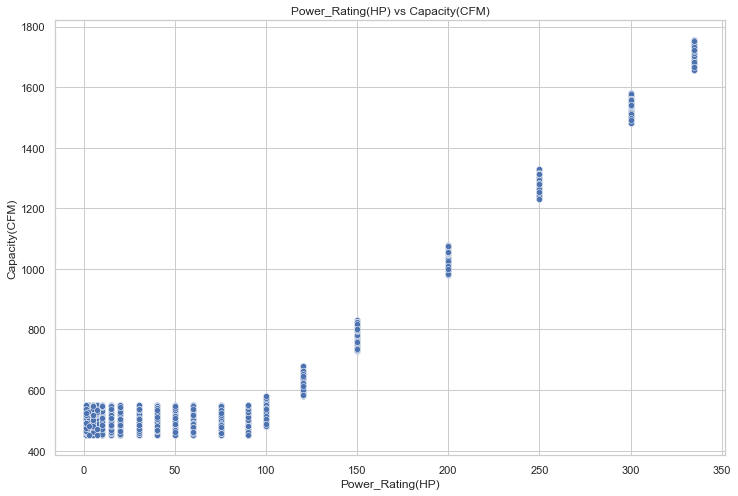

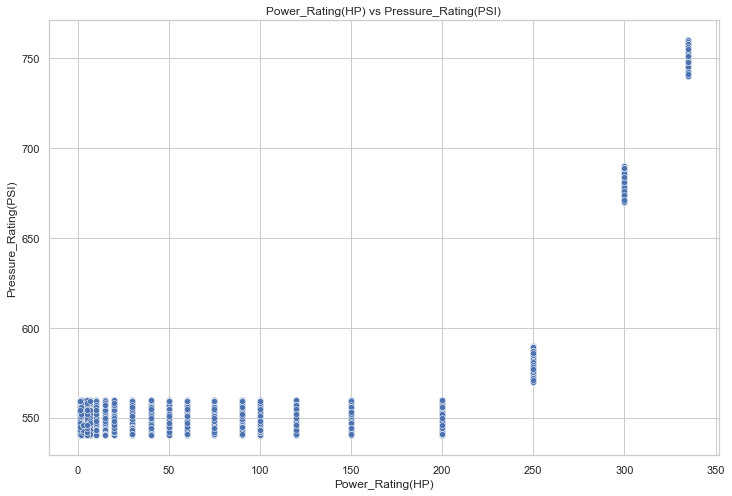

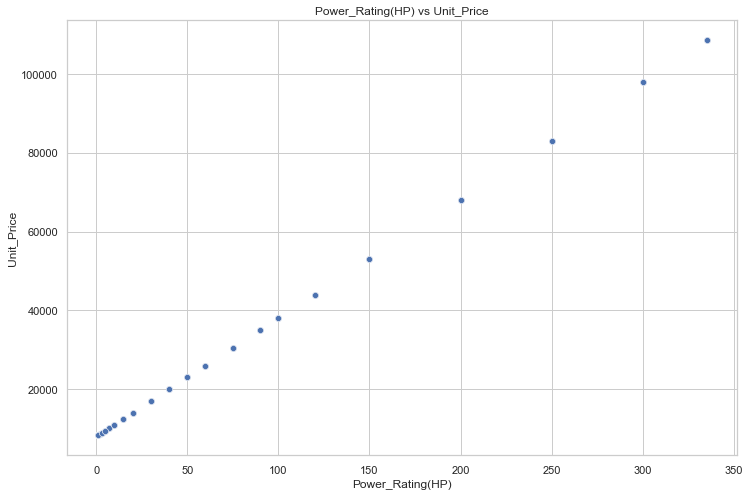

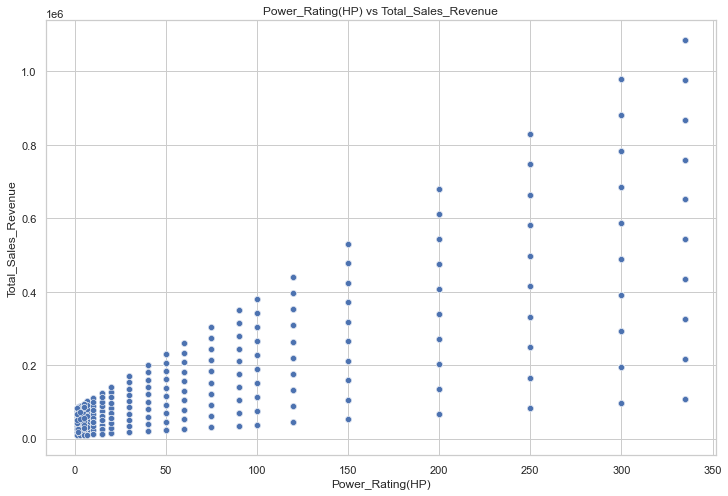

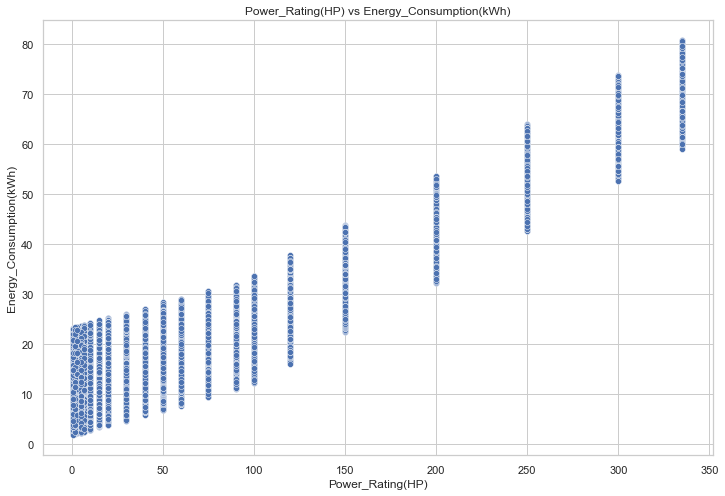

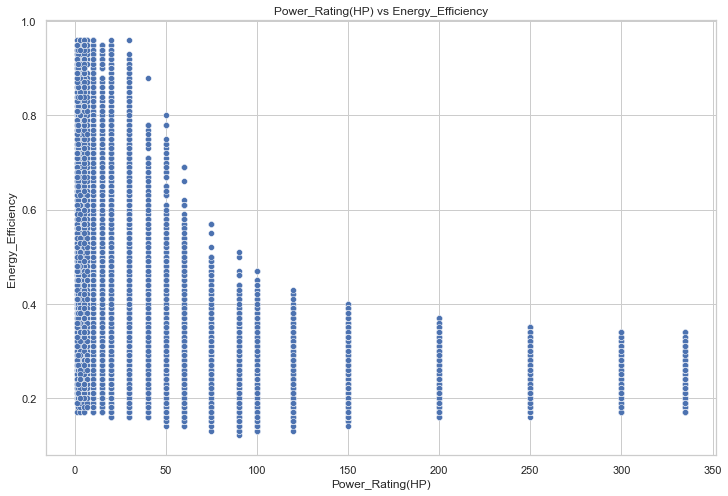

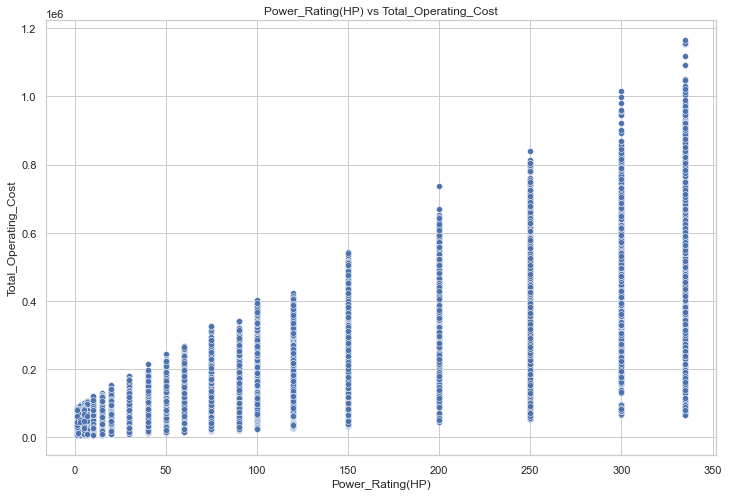

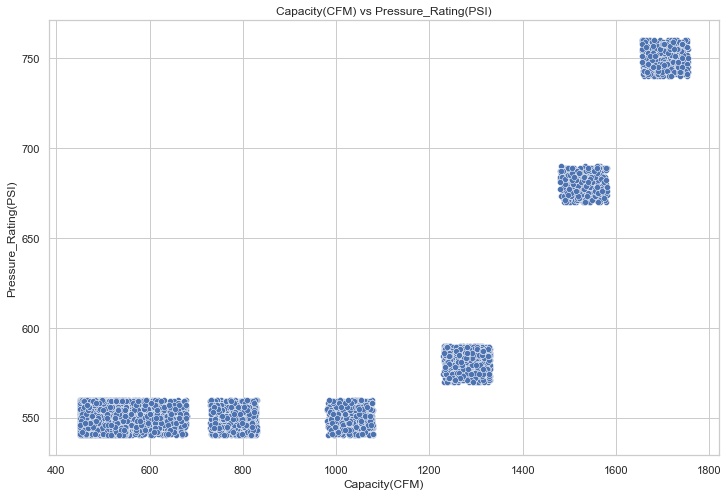

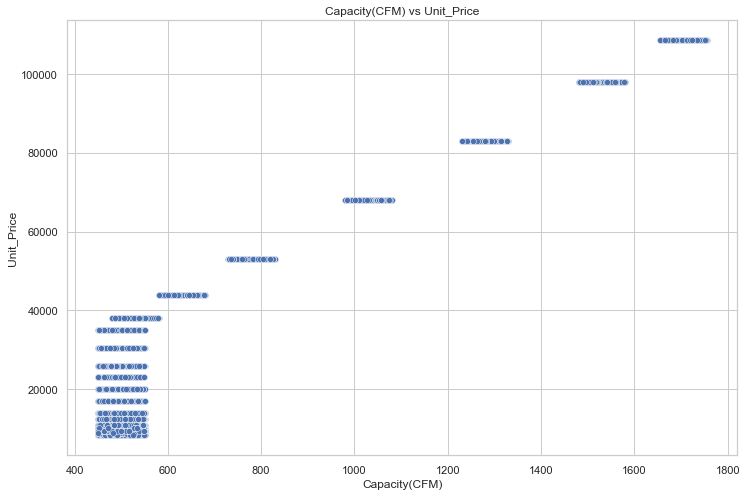

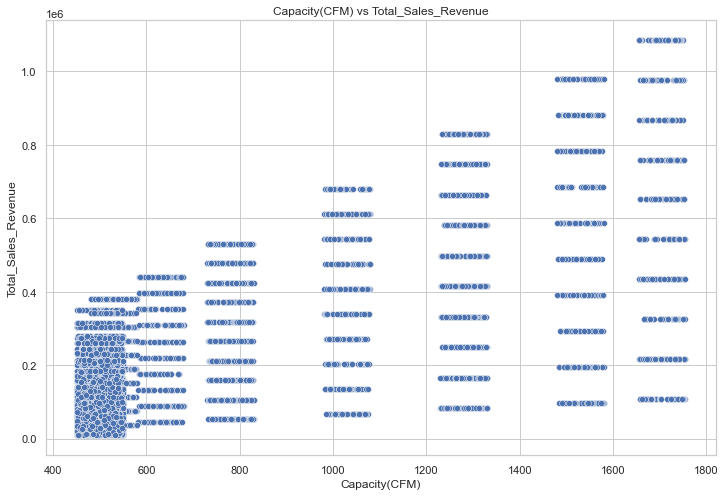

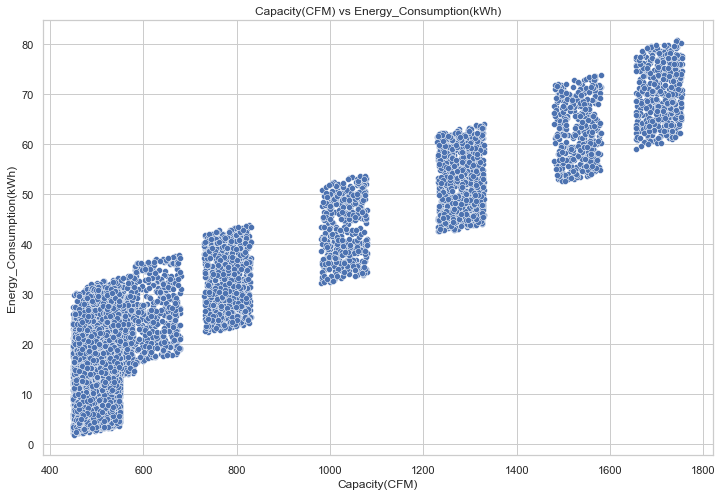

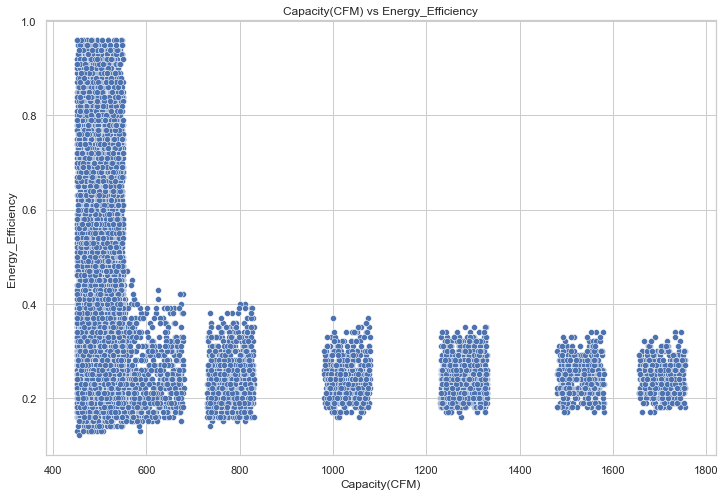

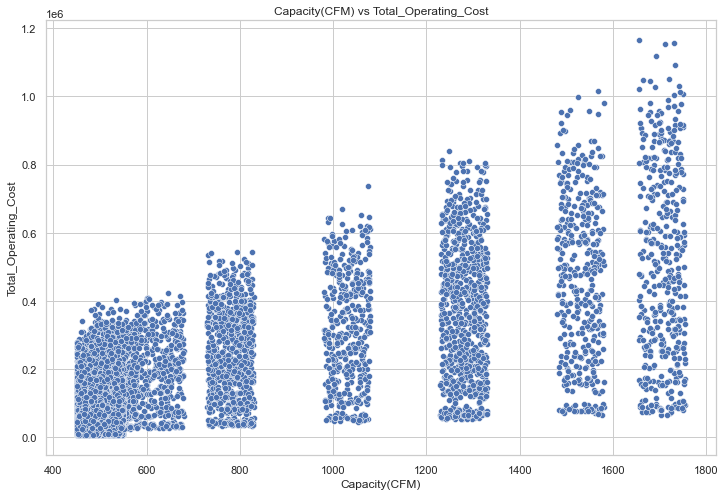

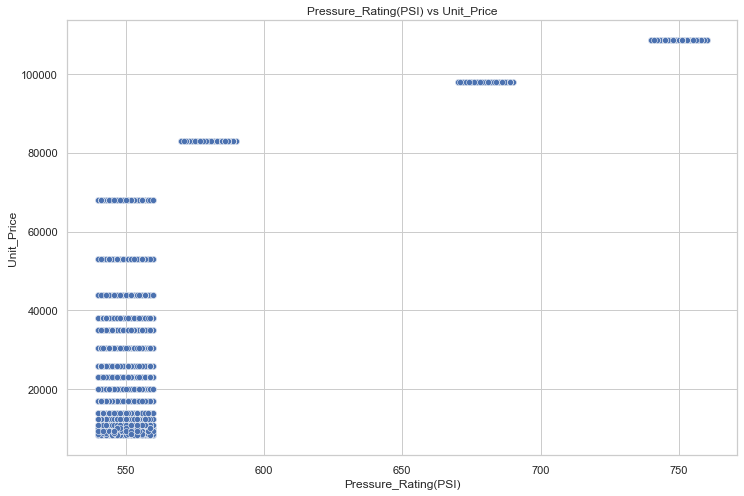

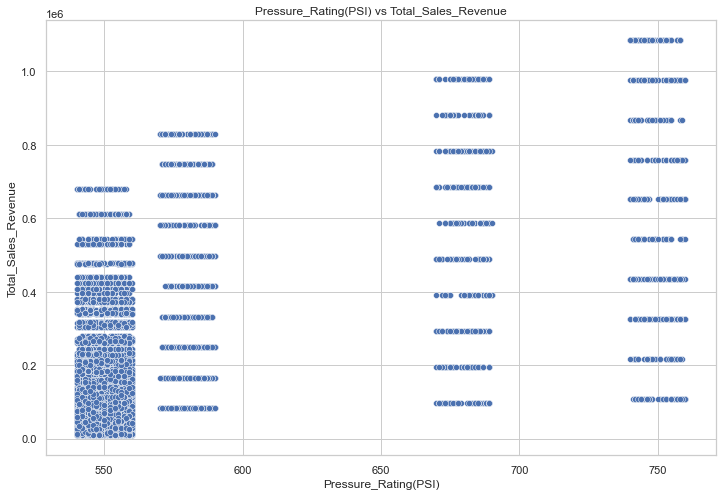

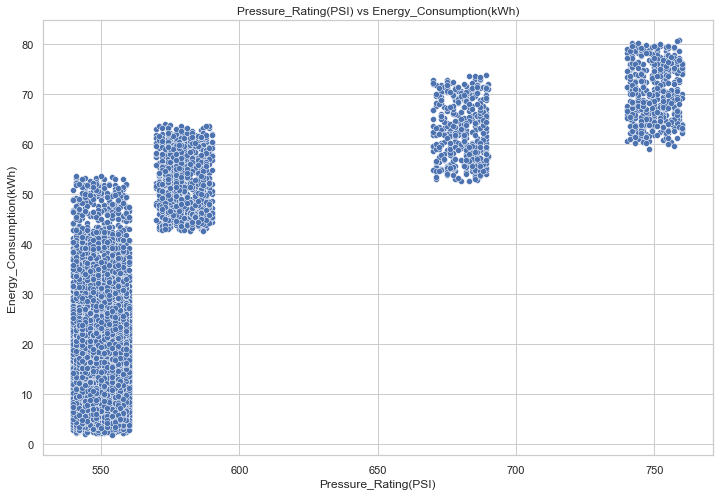

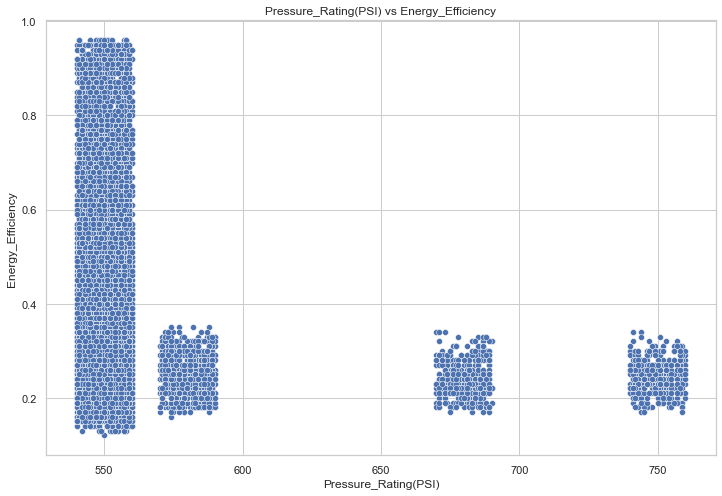

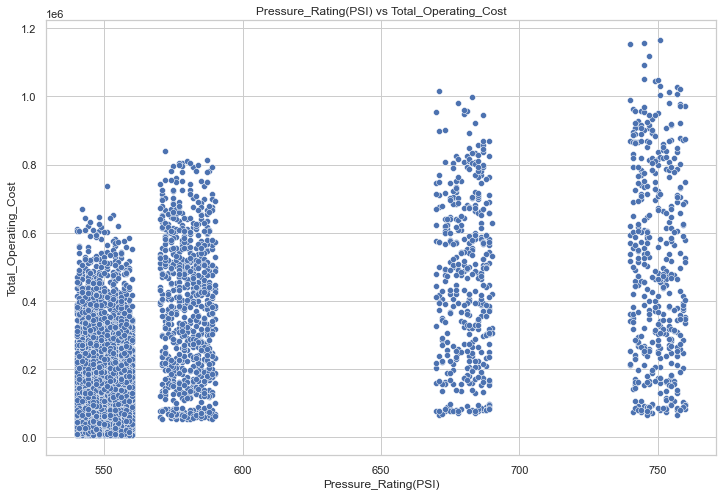

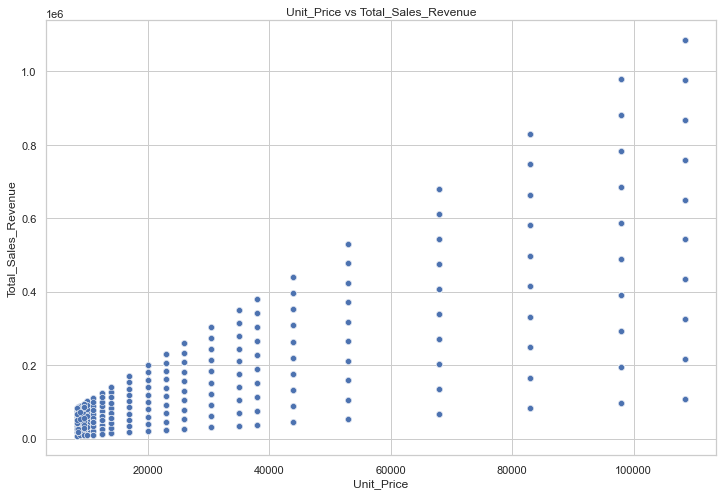

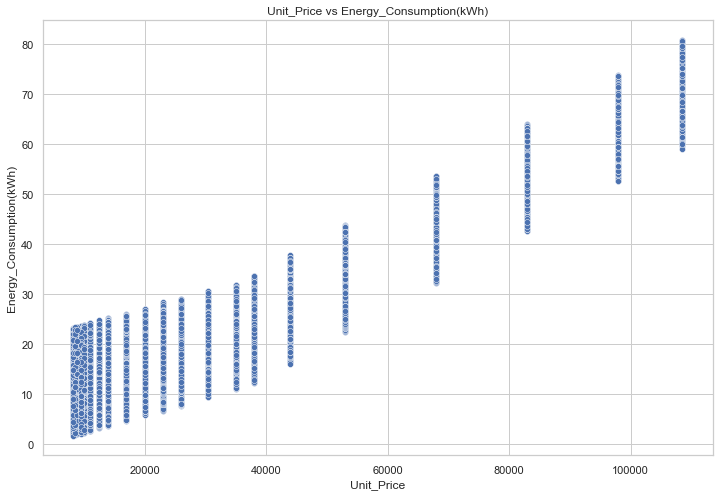

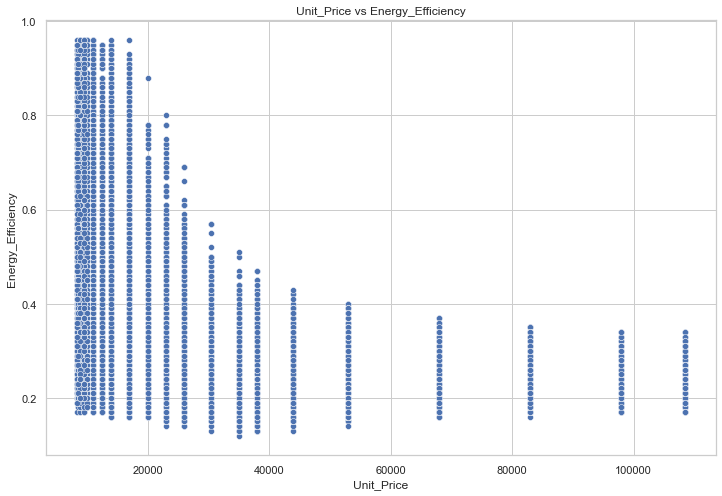

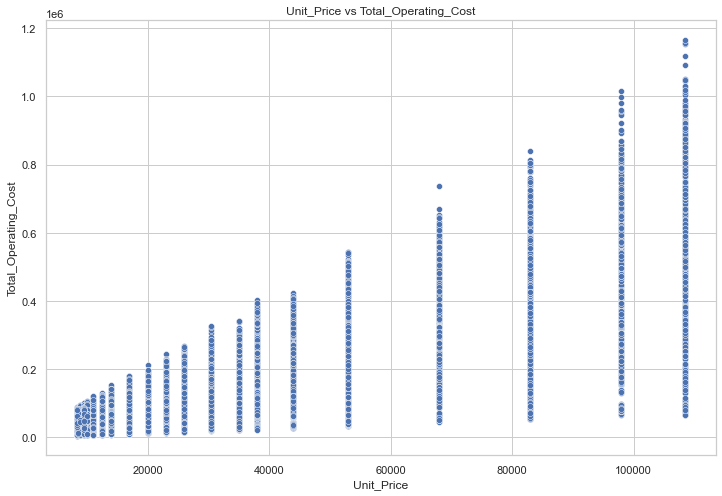

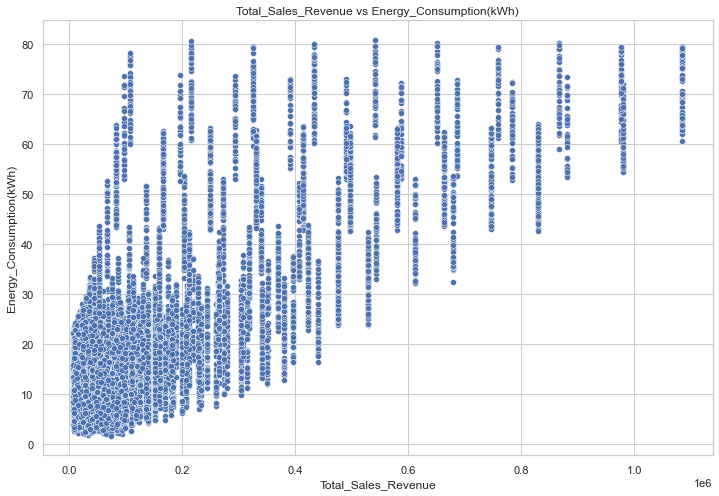

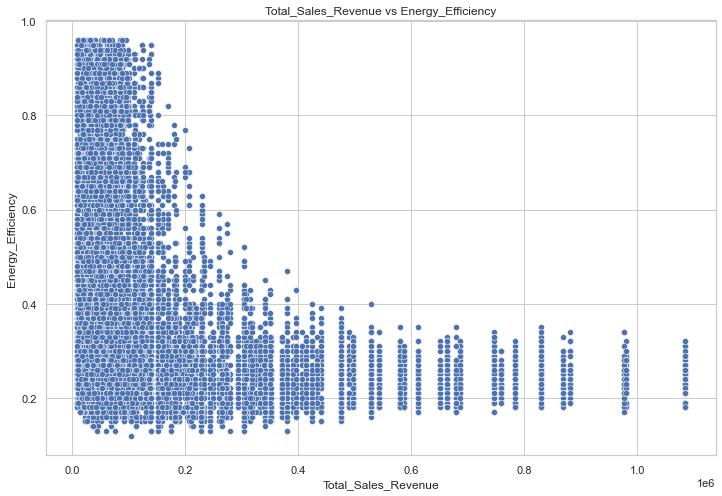

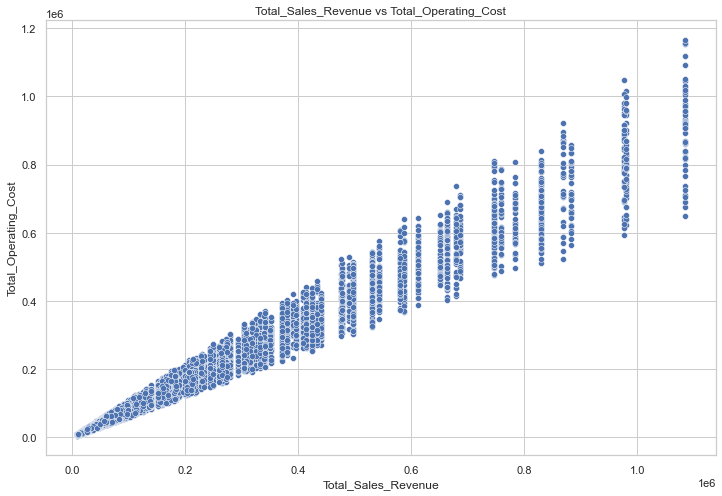

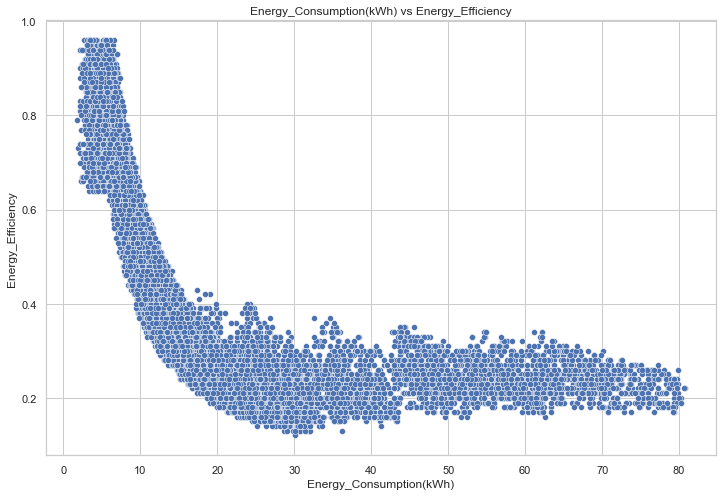

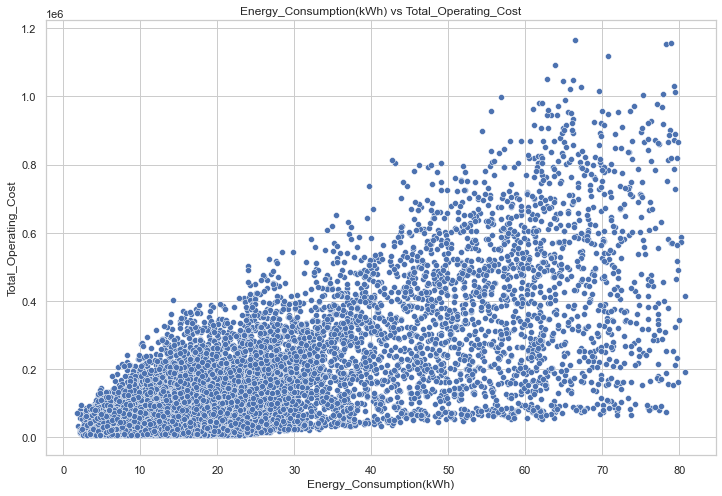

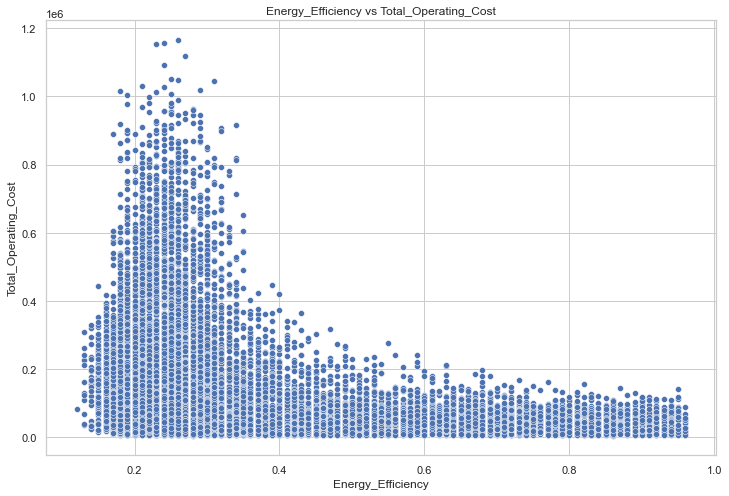

In [64]:
# Plot the relationships between Numeric Variables

for i in range(len(new_numerical_features)):
    for j in range(i + 1, len(new_numerical_features)):
        plt.figure(figsize=(12, 8))
        sns.scatterplot(x=new_numerical_features[i], y=new_numerical_features[j], data=df)
        plt.title(f'{new_numerical_features[i]} vs {new_numerical_features[j]}')

4. Data Preprocessing 

In [41]:
from sklearn.preprocessing import StandardScaler

In [43]:
#Transform Categorical Variables

df_trans = pd.get_dummies(df, columns=['Compressor_Type', 'Product_Name', 'Sales_Channel', 'Sales_Region', 'Service_Contracts', 'Maintenance_History', 'Warranty_Information', 'Environmental_Impact', 'Market_Trends', 'Marketing_Campaigns', 'Industry_Regulations', 'industries'], drop_first=True)


In [44]:
#Scale Numeric Data
numeric_columns = ['Power_Rating(HP)', 'Capacity(CFM)', 'Pressure_Rating(PSI)', 'Unit_Price', 'Quantity_Sold', 'Total_Sales_Revenue', 'Energy_Consumption(kWh)', 'Energy_Efficiency', 'Operating_Cost', 'Total_Operating_Cost', 'Profit']

scaler = StandardScaler()
df_trans[numeric_columns] = scaler.fit_transform(df_trans[numeric_columns])


5. Data Modelling

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

In [47]:
df_trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 63 columns):
 #   Column                                                           Non-Null Count  Dtype         
---  ------                                                           --------------  -----         
 0   Power_Rating(HP)                                                 15000 non-null  float64       
 1   Capacity(CFM)                                                    15000 non-null  float64       
 2   Pressure_Rating(PSI)                                             15000 non-null  float64       
 3   Date_of_Sale                                                     15000 non-null  datetime64[ns]
 4   Unit_Price                                                       15000 non-null  float64       
 5   Quantity_Sold                                                    15000 non-null  float64       
 6   Total_Sales_Revenue                                              15000 non-nul

In [48]:
# Address Multicolinearity Issues

df_cost = df_trans.drop(columns = ['Date_of_Sale', 'Age','Total_Sales_Revenue', 'Installation_Date', 'Total_Operating_Cost', 'Profit' ] )

In [49]:
X = df_cost.drop('Operating_Cost', axis = 1)
y = df_cost['Operating_Cost']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestRegressor()
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Use the best model for predictions
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)


Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}


In [54]:
# Feature Importance

rf_feature_model = RandomForestRegressor()
rf_feature_model.fit(X_train, y_train)

feature_importances = rf_feature_model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

feature_importance_df['Importance_percentage'] = feature_importance_df['Importance'] * 100

print(feature_importance_df[['Feature', 'Importance_percentage']].to_string(index=False, float_format="{:.2f}".format))

                                                        Feature  Importance_percentage
                                                  Capacity(CFM)                  43.38
                                               Power_Rating(HP)                  28.69
                                                     Unit_Price                  22.56
                                           Pressure_Rating(PSI)                   2.69
                                        Energy_Consumption(kWh)                   0.39
                                  Customer_Satisfaction_Ratings                   0.26
                                              Energy_Efficiency                   0.24
                                                  Quantity_Sold                   0.22
                                                     Sale_Month                   0.21
                                             Installation_Month                   0.19
                                       Sale

6. Model Evaluation

In [50]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score, median_absolute_error

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
evs = explained_variance_score(y_test, y_pred)
evs = explained_variance_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)  # RMSE is the square root of MSE
mae = mean_absolute_error(y_test, y_pred)
medae = median_absolute_error(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R-squared (R2): {r2}')
print(f'Explained Variance Score (EVS): {evs}')
print(f'Median Absolute Error (MedAE): {medae}')

Mean Squared Error (MSE): 0.034965625128280345
Root Mean Squared Error (RMSE): 0.18699097606109324
Mean Absolute Error (MAE): 0.11114680936197542
R-squared (R2): 0.9641989980784689
Explained Variance Score (EVS): 0.9641992118573673
Median Absolute Error (MedAE): 0.05972145012854485
